# OSE-Summer School 2019
## HW1, Felix Kubler

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
import math

### 1. Asset market equilibrium

In [2]:
def asset_market_eqm(gamma):
    
    def equations(x):
        # q1 : price of A1
        # q2 : price of A2
        # a1 : agent1's position on A1
        # a2 : agent2's position on A2
        q1, q2, a1, a2 = x
    
        # given parameters
        S = 4
        e1 = np.array([1,1,2,1,2])
        e2 = np.array([1,3,1,3,1])
        A1 = np.array([1,1,1,1])
        A2 = np.array([1,1,1.5,1.5])
    
        # optimality conditions
        eq1 = (e1[0]-q1*a1-q2*a2)**(-gamma)*q1- \
            (1/S)*((e1[1]+a1*A1[0]+a2*A2[0])**(-gamma)*A1[0]+
            (e1[2]+a1*A1[1]+a2*A2[1])**(-gamma)*A1[1]+
            (e1[3]+a1*A1[2]+a2*A2[2])**(-gamma)*A1[2]+
            (e1[4]+a1*A1[3]+a2*A2[3])**(-gamma)*A1[3])
        
        eq2 = (e1[0]-q1*a1-q2*a2)**(-gamma)*q2- \
            (1/S)*((e1[1]+a1*A1[0]+a2*A2[0])**(-gamma)*A2[0]+
            (e1[2]+a1*A1[1]+a2*A2[1])**(-gamma)*A2[1]+
            (e1[3]+a1*A1[2]+a2*A2[2])**(-gamma)*A2[2]+
            (e1[4]+a1*A1[3]+a2*A2[3])**(-gamma)*A2[3])
        
        eq3 = (e2[0]+q1*a1+q2*a2)**(-gamma)*q1- \
            (1/S)*((e2[1]-a1*A1[0]-a2*A2[0])**(-gamma)*A1[0]+
            (e2[2]-a1*A1[1]-a2*A2[1])**(-gamma)*A1[1]+
            (e2[3]-a1*A1[2]-a2*A2[2])**(-gamma)*A1[2]+
            (e2[4]-a1*A1[3]-a2*A2[3])**(-gamma)*A1[3])
        
        eq4 = (e2[0]+q1*a1+q2*a2)**(-gamma)*q2- \
            (1/S)*((e2[1]-a1*A1[0]-a2*A2[0])**(-gamma)*A2[0]+
            (e2[2]-a1*A1[1]-a2*A2[1])**(-gamma)*A2[1]+
            (e2[3]-a1*A1[2]-a2*A2[2])**(-gamma)*A2[2]+
            (e2[4]-a1*A1[3]-a2*A2[3])**(-gamma)*A2[3])
        
        return (eq1,eq2,eq3,eq4)
    
    sol = fsolve(equations, (0.5,1,0,0))
    return sol

In [5]:
sol_gamma2 = asset_market_eqm(2)
sol_gamma4 = asset_market_eqm(4)
sol_gamma8 = asset_market_eqm(8)
sol_gamma166 = asset_market_eqm(166)
print("(gamma=2)   ","(q1,q2,a1,a2) = ",sol_gamma2)
print("(gamma=4)   ","(q1,q2,a1,a2) = ",sol_gamma4)
print("(gamma=8)   ","(q1,q2,a1,a2) = ",sol_gamma8)
print("(gamma=166) ","(q1,q2,a1,a2) = ",sol_gamma166)

(gamma=2)    (q1,q2,a1,a2) =  [5.89777656e-01 7.37222070e-01 1.95406655e-02 8.68050974e-12]
(gamma=4)    (q1,q2,a1,a2) =  [ 5.18661303e-01  6.48326628e-01  4.02982364e-03 -4.44842601e-15]
(gamma=8)    (q1,q2,a1,a2) =  [ 5.01014401e-01  6.26268001e-01  1.56094149e-04 -1.68550113e-12]
(gamma=166)  (q1,q2,a1,a2) =  [ 5.00000000e-01  6.25000000e-01 -2.83751649e-18  1.89167766e-18]


### 2. Dynamic Programming (Tic-Tac-Toe)

### 3. Ramsey I

In [43]:
def ramsey_VFI(beta,kmin,kmax,nk):
    ## input
    # beta : discount factor
    # kmin : minimum value of capital
    # kmax : maximum value of capital
    # nk   : the number of capital grids
    
    # capital grid
    kgrid = np.linspace(kmin,kmax,num=nk)

    # transition matrix
    pi = np.array([0.5,0.5])

    # required matrices and vectors
    mY = np.zeros((len(kgrid),len(pi)),dtype=float)    # save output
    mV = np.zeros_like(mY)                             # save values for value function
    mPk = np.zeros_like(mY)                            # save optimal capital choice
    eV = np.zeros_like(mY)                             # save expected continuation value
    mVnew = np.zeros_like(mY)                          # save values for value function

    # production function
    def production(k,j):
        if j==0:
            f = 0.9*k**0.3 + 0.3*k
        else:
            f = 1.1*k**0.3 + 0.9*k
        return f

    # output
    for j in range(len(pi)):
        mY[:,j] = production(kgrid,j)

    # Value function iteration
    diff = 10
    it = 0
    tol = 10e-6

    while(diff > tol):
        
        it = it + 1
        eV = np.dot(mV,pi)
        
        for j in range(len(pi)):
            
            VV = -10000.0
            index = 0
            
            for ik in range(len(kgrid)):
                
                for ikp in range(index,len(kgrid)):
                    
                    cons = mY[ik,j]-kgrid[ikp]
                    val = math.log(cons) + beta*eV[ikp]
                
                    if val > VV:
                        VV = val
                        kp = kgrid[ikp]
                        index = ikp
                    else:
                        break
                    
                mVnew[ik,j] = VV
                mPk[ik,j] = kp
            
        diff = np.max(abs(mVnew-mV))
        mV = mVnew
        mVnew = np.zeros((len(kgrid),len(pi)),dtype=float)
    
    print("Iteration = ",it,",  diff = ",diff)
    
    # figures (f1 : value function, f2 : policy function)
    f1 = plt.figure()
    f2 = plt.figure()
    ax1 = f1.add_subplot(111)
    ax1.plot(kgrid,mV)
    ax1.legend(["z=1","z=2"])
    ax1.set_title('value function')
    ax2 = f2.add_subplot(111)
    ax2.plot(kgrid,mPk)
    ax2.legend(["z=1","z=2"])
    ax2.set_title('policy function')
    plt.show()

Iteration=  105 ,  diff=  9.995752350278053e-06


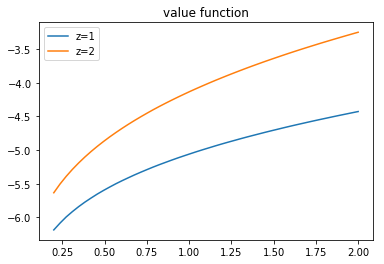

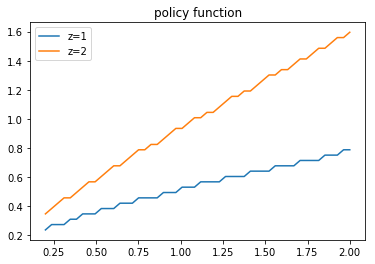

In [44]:
beta = 0.9
kmin = 0.2
kmax = 2.0

# the number of capital points = 50
ramsey_VFI(beta,kmin,kmax,50)

Iteration=  105 ,  diff=  9.990483335720057e-06


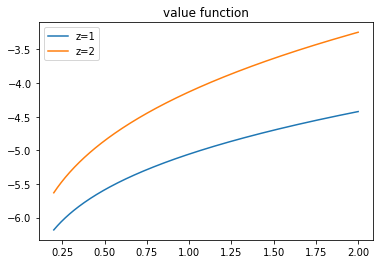

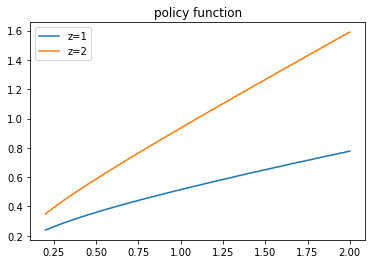

In [45]:
# the number of capital points = 500
ramsey_VFI(beta,kmin,kmax,500)

### End